<a href="https://colab.research.google.com/github/Knaut-007/GeneticAlgorithm-VRP/blob/main/src/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install necessary packages
!pip install matplotlib deap numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 3.4 MB/s eta 0:00:00


In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms


In [4]:
# How many places to visit (not counting the depot)
num_locations = 10

# How many vehicles will do the deliveries
num_vehicles = 3

# Random locations on a 100x100 grid
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]

# Depot at the center
depot = (50, 50)

# Show depot and all locations
print("Depot:", depot)
print("Locations:", locations)


Depot: (50, 50)
Locations: [(65, 98), (21, 10), (34, 79), (48, 1), (50, 49), (26, 37), (17, 26), (69, 7), (49, 41), (92, 71)]


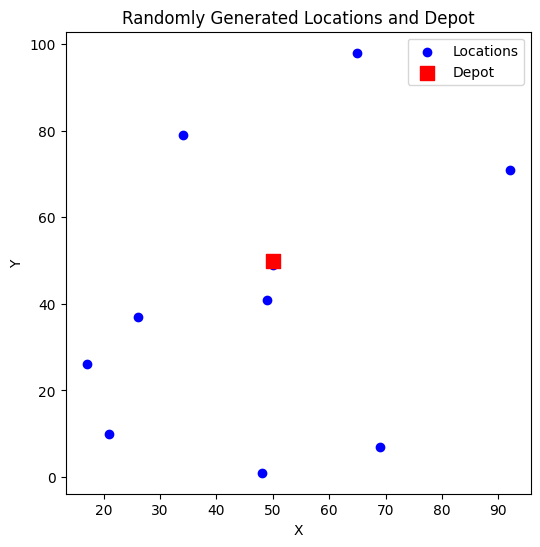

In [5]:
plt.figure(figsize=(6, 6))
x, y = zip(*locations)
plt.scatter(x, y, c='blue', label='Locations')
plt.scatter(*depot, c='red', marker='s', s=100, label='Depot')
plt.title('Randomly Generated Locations and Depot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [6]:
# The fitness function will try to keep total distance low and routes balanced
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Lower is better for both goals
creator.create("Individual", list, fitness=creator.FitnessMin)    # Each solution is just a list of locations

toolbox = base.Toolbox()

# Each individual is a random order of all the locations
toolbox.register("indices", random.sample, range(num_locations), num_locations)

# This sets up how to make a single solution and a whole group (population) of solutions
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# This function checks how good a solution is
def evalVRP(individual):
    total_distance = 0
    distances = []
    for i in range(num_vehicles):
        # Each vehicle gets its own route, starting and ending at the depot
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Add up the distance for this route
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    # If all vehicles travel similar distances, that's better (lower std deviation)
    balance_penalty = np.std(distances)
    return total_distance, balance_penalty

# Register the functions that handle evaluation and making new solutions
toolbox.register("evaluate", evalVRP)
toolbox.register("mate", tools.cxPartialyMatched)  # Mixes routes from two solutions
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Small random swaps in a route
toolbox.register("select", tools.selTournament, tournsize=3)  # Picks the best from random groups

print("Genetic algorithm structure set up successfully.")


Genetic algorithm structure set up successfully.
